# Capstone Project: Sales Data Analysis and Customer Insights

## Executive Summary
This analysis examines sales and customer data to identify key business insights, customer segments, and opportunities for revenue growth. The project demonstrates comprehensive data analysis skills including data cleaning, statistical analysis, visualization, and machine learning.

## Table of Contents
1. [Data Loading and Exploration](#1-data-loading-and-exploration)
2. [Data Cleaning and Preprocessing](#2-data-cleaning-and-preprocessing)
3. [Statistical Analysis](#3-statistical-analysis)
4. [Data Visualization](#4-data-visualization)
5. [Machine Learning Implementation](#5-machine-learning-implementation)
6. [Business Insights and Recommendations](#6-business-insights-and-recommendations)


## 1. Data Loading and Exploration


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


In [3]:
# Load the dataset
sales_df = pd.read_csv(r"/Users/sabrinachu/Desktop/Sabrina Chu - capstone-project/sales_data.csv")

In [4]:
# Data quality assessment
print("=== Data quality assessment ===")
print("Shape:", sales_df.shape)
print("Missing values:\n", sales_df.isnull().sum())
print("Data types:\n", sales_df.dtypes)
print("Duplicate rows:", sales_df.duplicated().sum())

=== Data quality assessment ===
Shape: (10000, 15)
Missing values:
 customer_id             0
age                   792
gender                524
location              408
income                557
registration_date       0
purchase_date           0
product_category        0
brand                   0
price                   0
quantity                0
revenue                 0
purchase_frequency      0
avg_order_value         0
customer_lifespan       0
dtype: int64
Data types:
 customer_id            object
age                   float64
gender                 object
location               object
income                float64
registration_date      object
purchase_date          object
product_category       object
brand                  object
price                 float64
quantity                int64
revenue               float64
purchase_frequency      int64
avg_order_value       float64
customer_lifespan     float64
dtype: object
Duplicate rows: 0


In [5]:
# Basic statistical summary
print("\nStatistical Summary:\n", sales_df.describe())


Statistical Summary:
                age         income         price      quantity       revenue  \
count  9208.000000    9443.000000  10000.000000  10000.000000  10000.000000   
mean     34.999457   41552.713227     83.449452      3.007700    249.741729   
std      11.247799   21242.242574     67.243974      1.420508    249.824137   
min      18.000000   20000.000000     10.000000      1.000000     10.000000   
25%      26.000000   25805.000000     32.247500      2.000000     79.427500   
50%      34.000000   36226.000000     61.020000      3.000000    165.060000   
75%      43.000000   51015.000000    118.197500      4.000000    336.265000   
max      80.000000  200000.000000    395.400000     11.000000   2374.860000   

       purchase_frequency  avg_order_value  customer_lifespan  
count        10000.000000     10000.000000       10000.000000  
mean             3.993100       249.385752           1.536834  
std              1.734345       252.387592           0.843773  
min      

## 2. Data Cleaning and Preprocessing


In [6]:
# Create derived features: Creating new columns (features) from existing data to add more value or insight
def classify_spender(revenue):
    if revenue >= 600:
        return 'High'
    elif revenue >= 200:
        return 'Medium'
    else:
        return 'Low'

sales_df['Spender_Segment'] = sales_df['revenue'].apply(classify_spender)

In [7]:
# Outlier detection and handling (Module 3)
# Select the revenue column
data_with_outliers = sales_df['revenue']

print(f"\n=== OUTLIER DETECTION ===")

# --- IQR Method ---
Q1 = np.percentile(data_with_outliers, 25)
Q3 = np.percentile(data_with_outliers, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data_with_outliers[(data_with_outliers < lower_bound) | (data_with_outliers > upper_bound)]

print(f"\n--- IQR METHOD ---")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Outlier bounds: [{lower_bound}, {upper_bound}]")
print(f"Outliers detected (IQR):\n{outliers_iqr}")

# --- Z-score Method ---
z_scores = np.abs(stats.zscore(data_with_outliers))
outliers_z = data_with_outliers[z_scores > 2]

print(f"\n--- Z-SCORE METHOD ---")
print(f"Outliers detected (Z-score > 2):\n{outliers_z}")


=== OUTLIER DETECTION ===

--- IQR METHOD ---
Q1: 79.42750000000001, Q3: 336.265, IQR: 256.8375
Outlier bounds: [-305.82874999999996, 721.52125]
Outliers detected (IQR):
10      1195.91
13       850.13
26       992.46
28       736.82
47      1215.28
         ...   
9927    1100.68
9959     784.97
9961    1223.19
9964     943.99
9974    1385.70
Name: revenue, Length: 591, dtype: float64

--- Z-SCORE METHOD ---
Outliers detected (Z-score > 2):
10      1195.91
13       850.13
26       992.46
47      1215.28
65      1092.83
         ...   
9927    1100.68
9959     784.97
9961    1223.19
9964     943.99
9974    1385.70
Name: revenue, Length: 531, dtype: float64


In [8]:
# Handle missing values before encoding
num_cols = ['age', 'income']
sales_df[num_cols] = sales_df[num_cols].fillna(sales_df[num_cols].median())

# Fill categorical columns with mode
cat_cols = ['gender', 'location']
for col in cat_cols:
    sales_df[col] = sales_df[col].fillna(sales_df[col].mode()[0])

print("Missing values after handling:\n", sales_df.isnull().sum())


Missing values after handling:
 customer_id           0
age                   0
gender                0
location              0
income                0
registration_date     0
purchase_date         0
product_category      0
brand                 0
price                 0
quantity              0
revenue               0
purchase_frequency    0
avg_order_value       0
customer_lifespan     0
Spender_Segment       0
dtype: int64


## 3. Statistical Analysis


In [9]:
# Correlation analysis
# Select only numeric columns for correlation
numeric_cols = sales_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Display correlation matrix
print("\n=== CORRELATION MATRIX ===")
print(corr_matrix)



=== CORRELATION MATRIX ===
                         age    income     price  quantity   revenue  \
age                 1.000000 -0.007335  0.019798  0.007552  0.023835   
income             -0.007335  1.000000  0.012819  0.002273  0.015217   
price               0.019798  0.012819  1.000000 -0.013080  0.801652   
quantity            0.007552  0.002273 -0.013080  1.000000  0.452601   
revenue             0.023835  0.015217  0.801652  0.452601  1.000000   
purchase_frequency -0.013537 -0.001222  0.005232  0.003919  0.002415   
avg_order_value     0.023485  0.013385  0.792096  0.445854  0.986810   
customer_lifespan   0.013555 -0.007343  0.000372 -0.002511 -0.000763   

                    purchase_frequency  avg_order_value  customer_lifespan  
age                          -0.013537         0.023485           0.013555  
income                       -0.001222         0.013385          -0.007343  
price                         0.005232         0.792096           0.000372  
quantity       

In [10]:
# Hypothesis testing:

# 1. Create a contingency table 
contingency_table = pd.crosstab(sales_df['product_category'], sales_df['brand'])

print("=== CONTINGENCY TABLE ===")
print(contingency_table)
print("\n")

# 2. Run the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# 3. Interpret the result
alpha = 0.05  # significant level
if p_value < alpha:
    print(f"Result: The p-value ({p_value:.4f}) is less than {alpha}.")
    print("We reject the null hypothesis. There IS a significant association between category and brand.")
else:
    print(f"Result: The p-value ({p_value:.4f}) is greater than {alpha}.")
    print("We fail to reject the null hypothesis. There is NO significant association between category and brand.")

=== CONTINGENCY TABLE ===
brand             Brand A  Brand B  Brand C  Brand D  Brand E  Brand F  \
product_category                                                         
Automotive            168      162      174      172      168      185   
Beauty                154      154      170      146      155      145   
Books                 162      150      171      158      152      155   
Clothing              145      168      151      150      168      153   
Electronics           147      167      166      151      164      154   
Home & Garden         146      154      145      156      142      141   
Sports                151      154      149      174      174      166   
Toys                  158      145      136      144      151      144   

brand             Brand G  Brand H  
product_category                    
Automotive            148      154  
Beauty                182      161  
Books                 151      152  
Clothing              168      170  
Electronics

In [11]:
# === CONFIDENCE INTERVALS FOR KEY BUSINESS METRICS ===

import numpy as np
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    """
    Returns mean, lower bound, and upper bound (CI).
    """
    data = np.array(data.dropna())     # drop missing
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)              # standard error
    margin = sem * stats.t.ppf((1 + confidence) / 2., n - 1)
    return mean, mean - margin, mean + margin


print("\n=== CONFIDENCE INTERVALS (95%) ===")

# 1. Revenue CI
rev_mean, rev_low, rev_high = mean_confidence_interval(sales_df['revenue'])
print(f"Revenue Mean CI: {rev_low:.2f}  to  {rev_high:.2f} (mean={rev_mean:.2f})")

# 2. Quantity CI
qty_mean, qty_low, qty_high = mean_confidence_interval(sales_df['quantity'])
print(f"Quantity Mean CI: {qty_low:.2f}  to  {qty_high:.2f} (mean={qty_mean:.2f})")

# 3. Income CI
inc_mean, inc_low, inc_high = mean_confidence_interval(sales_df['income'])
print(f"Income Mean CI: {inc_low:.2f}  to  {inc_high:.2f} (mean={inc_mean:.2f})")

# === CONFIDENCE INTERVAL FOR PROPORTIONS (Spender Segment) ===

def proportion_conf_interval(count, nobs, confidence=0.95):
    """
    CI for proportions using normal approximation.
    """
    prop = count / nobs
    z = stats.norm.ppf((1 + confidence) / 2.)
    se = np.sqrt(prop * (1 - prop) / nobs)
    return prop, prop - z * se, prop + z * se


print("\n=== CONFIDENCE INTERVALS — SPENDER SEGMENT PROPORTIONS ===")

segment_counts = sales_df['Spender_Segment'].value_counts()
total = len(sales_df)

for seg, count in segment_counts.items():
    p, low, high = proportion_conf_interval(count, total)
    print(f"{seg}: {p:.3f} proportion CI = ({low:.3f}, {high:.3f})")
print("\n=== CONFIDENCE INTERVALS — PRODUCT CATEGORY PROPORTIONS ===")

# Count categories
category_counts = sales_df['product_category'].value_counts()
total = len(sales_df)

# Reuse the same proportion function
for cat, count in category_counts.items():
    p, low, high = proportion_conf_interval(count, total)
    print(f"{cat}: {p:.3f} proportion CI = ({low:.3f}, {high:.3f})")



=== CONFIDENCE INTERVALS (95%) ===
Revenue Mean CI: 244.84  to  254.64 (mean=249.74)
Quantity Mean CI: 2.98  to  3.04 (mean=3.01)
Income Mean CI: 40850.68  to  41661.35 (mean=41256.02)

=== CONFIDENCE INTERVALS — SPENDER SEGMENT PROPORTIONS ===
Low: 0.572 proportion CI = (0.562, 0.581)
Medium: 0.335 proportion CI = (0.326, 0.344)
High: 0.093 proportion CI = (0.088, 0.099)

=== CONFIDENCE INTERVALS — PRODUCT CATEGORY PROPORTIONS ===
Automotive: 0.133 proportion CI = (0.126, 0.140)
Sports: 0.130 proportion CI = (0.123, 0.136)
Clothing: 0.127 proportion CI = (0.121, 0.134)
Beauty: 0.127 proportion CI = (0.120, 0.133)
Books: 0.125 proportion CI = (0.119, 0.132)
Electronics: 0.123 proportion CI = (0.117, 0.130)
Toys: 0.118 proportion CI = (0.111, 0.124)
Home & Garden: 0.117 proportion CI = (0.111, 0.123)


## 4. Data Visualization


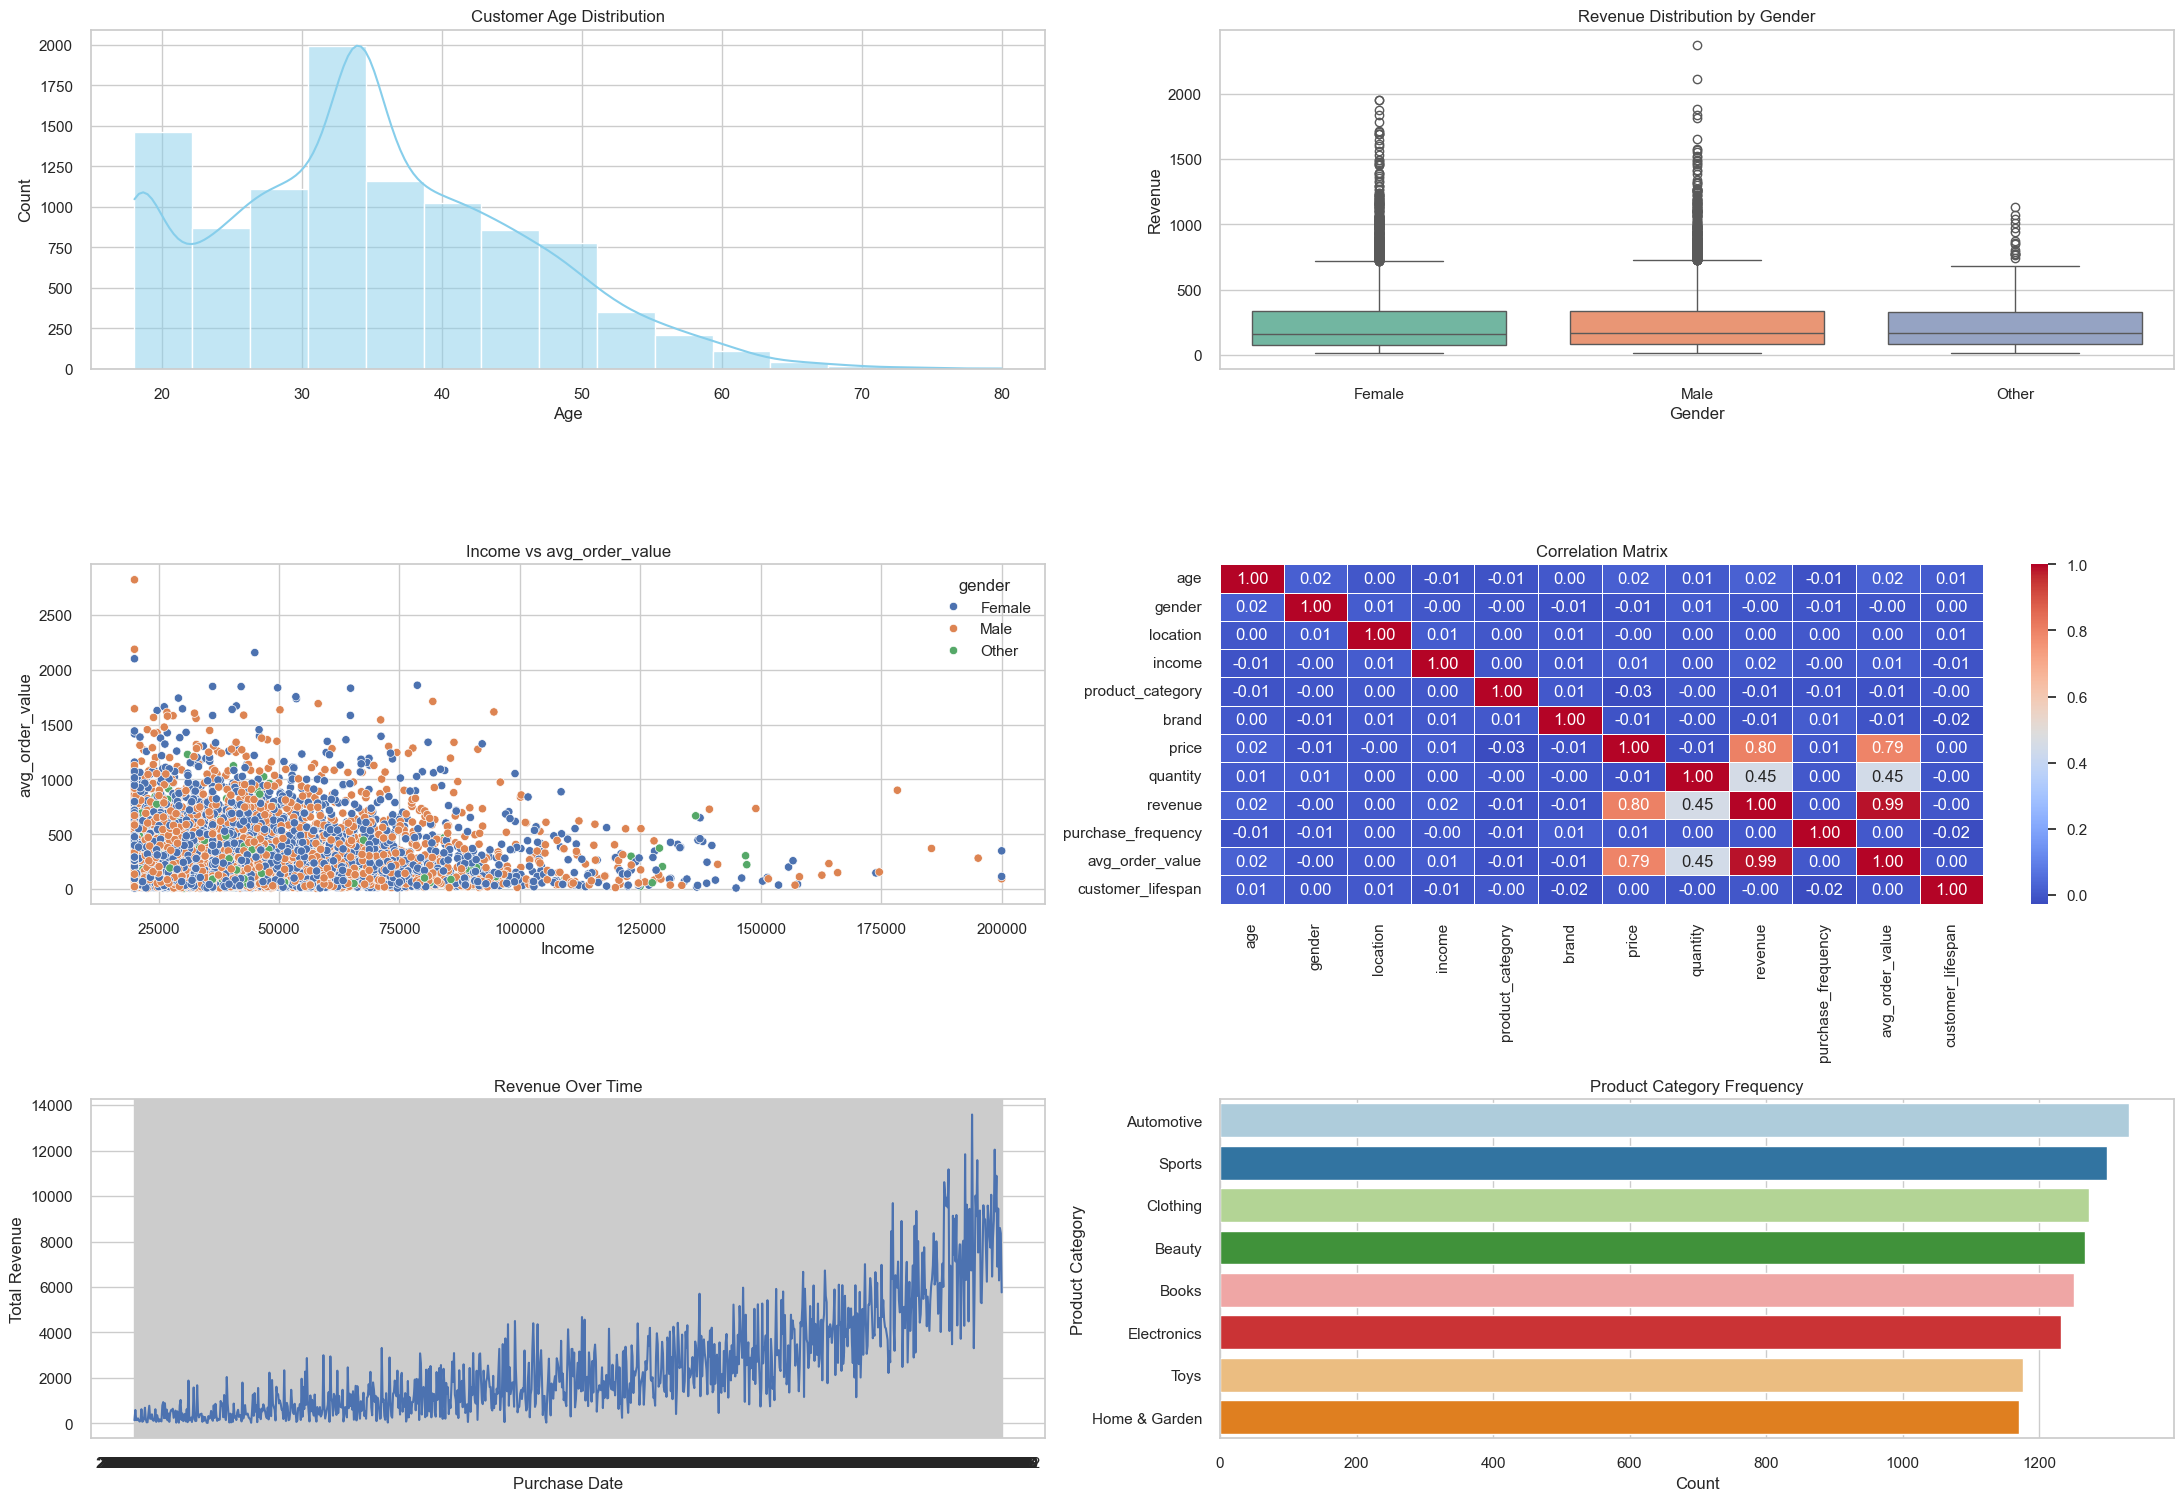

In [12]:
# Encode categorical variables (optional: for heatmap)
encoded_df = sales_df.copy()
label_cols = ['gender', 'location', 'product_category', 'brand']
for col in label_cols:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(22, 20))

# 1. Histogram – Age distribution
plt.subplot(4, 2, 1)
sns.histplot(sales_df['age'], bins=15, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Box Plot – Revenue by Gender
plt.subplot(4, 2, 2)
sns.boxplot(data=sales_df, x='gender', y='revenue', palette='Set2')
plt.title('Revenue Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')

#3. Scatter Plot – Income vs. avg_order_value
plt.subplot(4, 2, 3)
sns.scatterplot(data=sales_df, x='income', y='avg_order_value', hue='gender') #Income/age and avg_order_value makes more sense
plt.title('Income vs avg_order_value')
plt.xlabel('Income')
plt.ylabel('avg_order_value')

# 4. Heatmap – Correlation matrix (with categorical included via encoding)
plt.subplot(4, 2, 4)
corr = encoded_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

# 5. Time Series – Revenue over time
plt.subplot(4, 2, 5)
time_series = sales_df.groupby('purchase_date')['revenue'].sum().reset_index()
sns.lineplot(data=time_series, x='purchase_date', y='revenue')
plt.title('Revenue Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Total Revenue')

# 6. Count Plot – Product Category
plt.subplot(4, 2, 6)
sns.countplot(data=sales_df, y='product_category', 
              order=sales_df['product_category'].value_counts().index, palette='Paired')
plt.title('Product Category Frequency')
plt.xlabel('Count')
plt.ylabel('Product Category')

# Layout adjustment
plt.tight_layout()
plt.show()



Advanced Plot Types:


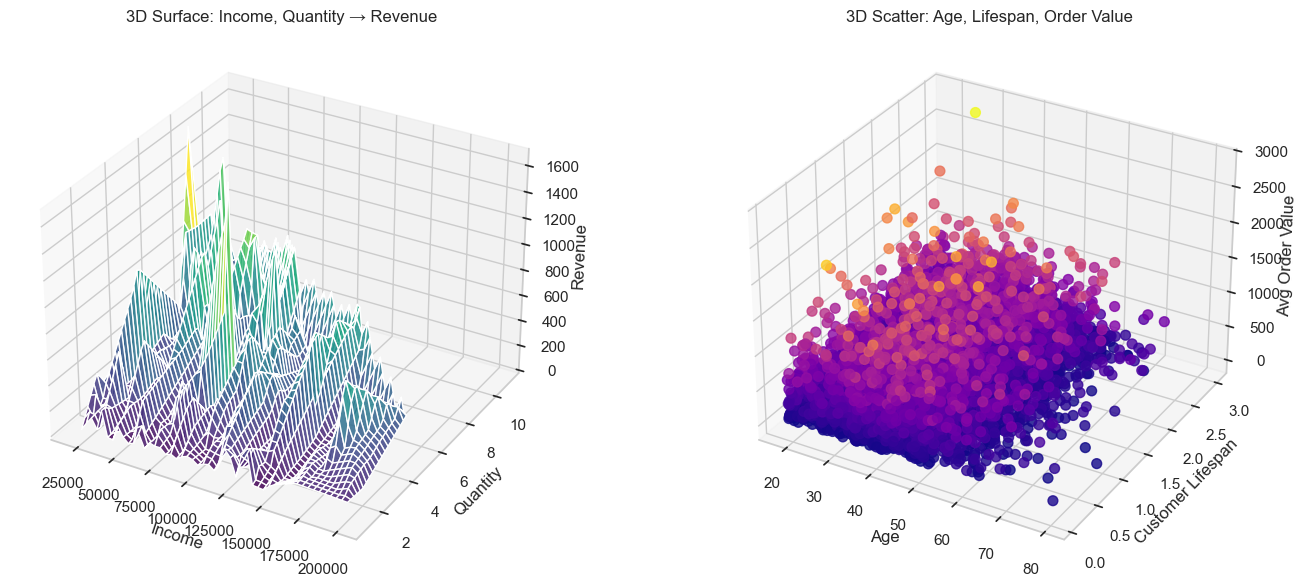

In [13]:
# Advanced visualizations
# Advanced Plot Types
print("\nAdvanced Plot Types:")

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

fig = plt.figure(figsize=(15, 6))

# 1. 3D Surface Plot — income, quantity → revenue
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Prepare grid
x = sales_df['income']
y = sales_df['quantity']
z = sales_df['revenue']
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot surface
ax1.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.85)
ax1.set_title('3D Surface: Income, Quantity → Revenue')
ax1.set_xlabel('Income')
ax1.set_ylabel('Quantity')
ax1.set_zlabel('Revenue')

# 2. 3D Scatter Plot — age, lifespan, avg_order_value
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

x_3d = sales_df['age']
y_3d = sales_df['customer_lifespan']
z_3d = sales_df['avg_order_value']
colors = sales_df['revenue']

ax2.scatter(x_3d, y_3d, z_3d, c=colors, cmap='plasma', s=50, alpha=0.8)
ax2.set_title('3D Scatter: Age, Lifespan, Order Value')
ax2.set_xlabel('Age')
ax2.set_ylabel('Customer Lifespan')
ax2.set_zlabel('Avg Order Value')

plt.tight_layout()
plt.show()


## 5. Machine Learning Implementation


In [14]:
# Prepare data for machine learning
# =============================================================================
# 1. DATA PREPARATION FOR MACHINE LEARNING
# =============================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Identify features and targets ---
# Example targets (you can adjust):
#   Classification → Predict 'gender'
#   Regression → Predict 'revenue'

target_class = 'gender'
target_reg = 'revenue'

# --- Separate features ---
X = sales_df.drop(columns=[target_class, target_reg])
y_class = sales_df[target_class]
y_reg = sales_df[target_reg]

# --- Train/test split ---
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- Identify column types ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# --- Preprocessing pipeline ---
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


--- CLASSIFICATION: Logistic Regression ---
Accuracy: 0.4715
              precision    recall  f1-score   support

      Female       0.48      0.59      0.53       979
        Male       0.46      0.39      0.42       944
       Other       0.00      0.00      0.00        77

    accuracy                           0.47      2000
   macro avg       0.31      0.33      0.32      2000
weighted avg       0.45      0.47      0.46      2000


--- CLASSIFICATION: Random Forest ---
Accuracy: 0.4830
              precision    recall  f1-score   support

      Female       0.49      0.82      0.61       979
        Male       0.46      0.17      0.25       944
       Other       0.00      0.00      0.00        77

    accuracy                           0.48      2000
   macro avg       0.32      0.33      0.29      2000
weighted avg       0.46      0.48      0.42      2000



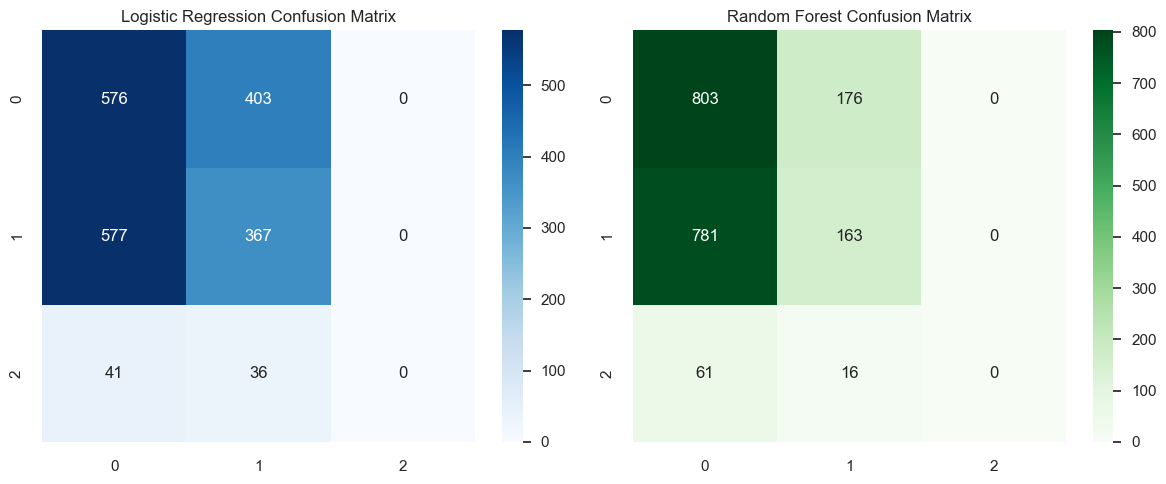

In [15]:
# Classification Task 
# =============================================================================
# 2. CLASSIFICATION TASK: Predicting Gender
# =============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Model 1: Logistic Regression ---
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train_cls, y_train_cls)
y_pred_lr_cls = log_reg_pipeline.predict(X_test_cls)

acc_lr = accuracy_score(y_test_cls, y_pred_lr_cls)
print("--- CLASSIFICATION: Logistic Regression ---")
print(f"Accuracy: {acc_lr:.4f}")
print(classification_report(y_test_cls, y_pred_lr_cls))

# --- Model 2: Random Forest Classifier ---
rf_cls_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_cls_pipeline.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls_pipeline.predict(X_test_cls)

acc_rf = accuracy_score(y_test_cls, y_pred_rf_cls)
print("\n--- CLASSIFICATION: Random Forest ---")
print(f"Accuracy: {acc_rf:.4f}")
print(classification_report(y_test_cls, y_pred_rf_cls))

# --- Visualization: Confusion Matrices ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test_cls, y_pred_lr_cls), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test_cls, y_pred_rf_cls), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()


--- REGRESSION: Linear Regression ---
R²: 0.9750
RMSE: 39.2292

--- REGRESSION: Random Forest ---
R²: 0.9926
RMSE: 21.3916


Text(0.5, 1.0, 'Top 10 Feature Importances (Random Forest Regressor)')

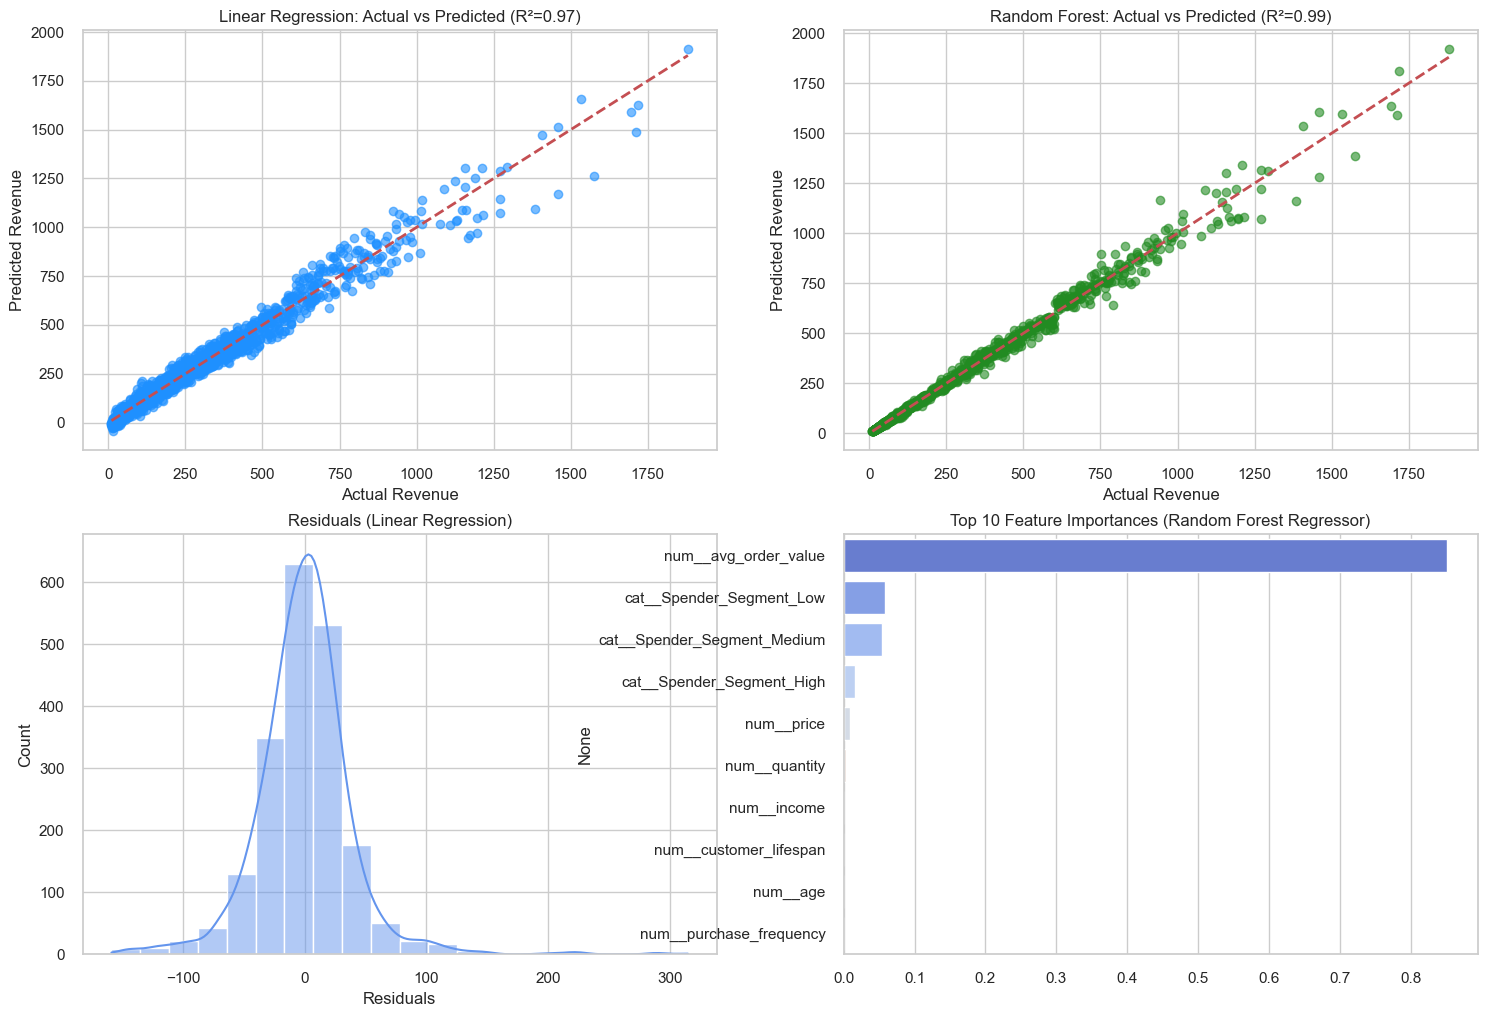

In [16]:
# Regression Task
# =============================================================================
# 3. REGRESSION TASK: Predicting Revenue
# =============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# --- Model 1: Linear Regression ---
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_pipeline.predict(X_test_reg)

r2_lr = r2_score(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))

print("--- REGRESSION: Linear Regression ---")
print(f"R²: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

# --- Model 2: Random Forest Regressor ---
rf_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg_pipeline.predict(X_test_reg)

r2_rf = r2_score(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))

print("\n--- REGRESSION: Random Forest ---")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

# --- Visualization Dashboard ---
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# 1. Linear Regression Predictions
plt.subplot(2, 2, 1)
plt.scatter(y_test_reg, y_pred_lr, color='dodgerblue', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.title(f"Linear Regression: Actual vs Predicted (R²={r2_lr:.2f})")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")

# 2. Random Forest Predictions
plt.subplot(2, 2, 2)
plt.scatter(y_test_reg, y_pred_rf, color='forestgreen', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.title(f"Random Forest: Actual vs Predicted (R²={r2_rf:.2f})")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")

# 3. Residual Distribution (LR)
plt.subplot(2, 2, 3)
residuals_lr = y_test_reg - y_pred_lr
sns.histplot(residuals_lr, bins=20, kde=True, color='cornflowerblue')
plt.title("Residuals (Linear Regression)")
plt.xlabel("Residuals")

# 4. Feature Importances (RF)
plt.subplot(2, 2, 4)
rf_model = rf_reg_pipeline.named_steps['model']
importances = rf_model.feature_importances_
feature_names = rf_reg_pipeline.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='coolwarm')
plt.title("Top 10 Feature Importances (Random Forest Regressor)")

## 6. Business Insights and Recommendations


In [17]:
# Customer Insight analysis
# Average spend by gender
avg_spend_by_gender = sales_df.groupby('gender')['revenue'].mean()

# Top product categories by revenue
top_categories = sales_df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

# Average income by spender segment
income_by_segment = sales_df.groupby('Spender_Segment')['income'].mean()


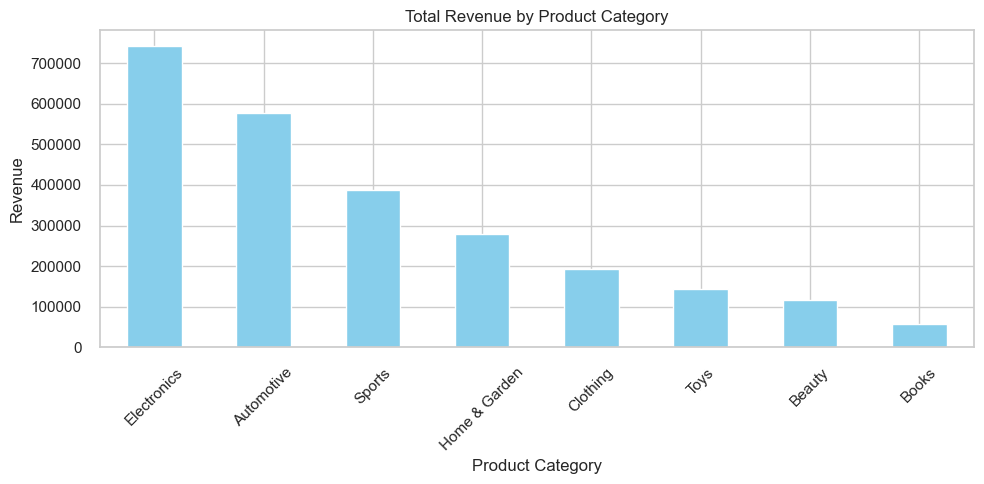

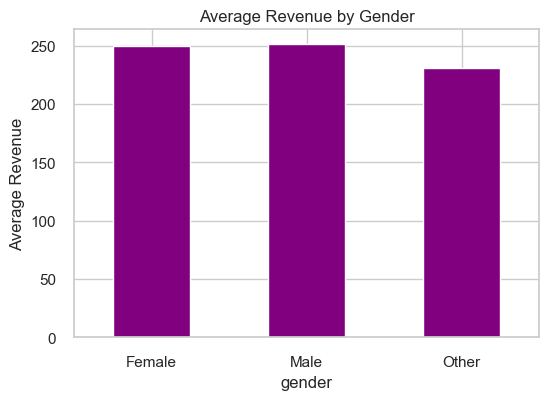

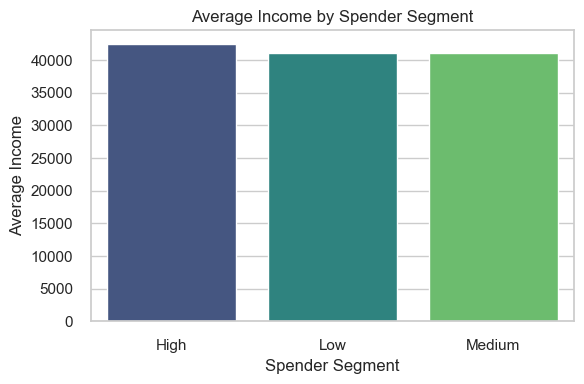

In [18]:
# Visualize Insight

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Revenue by Product Category
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average Spend by Gender
plt.figure(figsize=(6, 4))
avg_spend_by_gender.plot(kind='bar', color='purple')
plt.title('Average Revenue by Gender')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()

# 3. Calculate average income by spender segment
income_by_segment = sales_df.groupby('Spender_Segment')['income'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=income_by_segment.index, y=income_by_segment.values, palette='viridis')
plt.title('Average Income by Spender Segment')
plt.xlabel('Spender Segment')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()



In [19]:
# Key business metrics

# Overall KPIs
total_revenue = sales_df['revenue'].sum()
avg_order_value = sales_df['avg_order_value'].mean()
avg_customer_lifespan = sales_df['customer_lifespan'].mean()
num_customers = sales_df['customer_id'].nunique()

print("=== KEY BUSINESS METRICS ===")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Average Customer Lifespan: {avg_customer_lifespan:.2f} months")
print(f"Total Unique Customers: {num_customers}")



=== KEY BUSINESS METRICS ===
Total Revenue: $2,497,417.29
Average Order Value: $249.39
Average Customer Lifespan: 1.54 months
Total Unique Customers: 10000


## Executive Summary and Recommendations

### Key Findings:
1. Category Value is Highly Skewed: The most significant finding is the dramatic difference in average revenue per purchase across product categories. Electronics ($603.56) and Automotive ($432.91) are high-value drivers, while categories like Books ($46.53) and Beauty ($91.62) have a much lower average transaction value.
2. Order Value is Price-Driven: The correlation matrix reveals that high-revenue orders are primarily driven by the price of items (0.80 correlation with revenue), not the quantity of items (0.45 correlation). This reinforces the importance of the high-value Electronics and Automotive categories.
3. Spender Segmentation: The customer base consists of a large group of Low (57.2%) and Medium (33.5%) spenders, with a small, valuable cohort of High spenders (9.3%).
4. Demographic Targeting is Ineffective: The models couldn’t predict gender accurately—both got less than 50% right and completely missed the “Other” category. This suggests there’s no clear pattern in the data (like age, income, or location) that links to gender. So, using gender to target customers probably won’t work well with this dataset.

### Strategic Recommendations:

#### 1. Launch High-Value Category Campaigns:
- Recommendation: Aggressively market the Electronics and Automotive categories.
- Action: Create targeted cross-selling and upselling campaigns for these items. Instead of discounting, focus on "bundle" offers (e.g., a laptop with a high-margin mouse and keyboard) to leverage the high-price, high-revenue correlation.
- Target: Focus this strategy on the Medium (33.5%) and High (9.3%) spender segments, who are already predisposed to higher-value purchases.
#### 2    Increase AOV in Low-Value Categories:
- Recommendation: Implement strategies to increase the Average Order Value (AOV) for Books, Beauty, Toys, and Clothing.
- Action: Introduce a "free shipping" threshold slightly above the current average AOV for these categories. Implement "3-for-2" or "buy $50, get 10% off" promotions to encourage adding more items to the cart, directly targeting the quantity metric for these lower-priced goods.
#### 3    Develop a Loyalty Program to Encourage Customers to Spend More Over Time:
- Recommendation:  Target new Customers that are a part of the Low and Medium Spending Segments to purchase Beauty, Books, Clothing types of products with a lower price. And slowly increase their loyalty to the brand and target selling the more high revenue products to them over time to increase Customer Lifetime Value (CLV).
- Action: Create a formal loyalty program offering perks like early access to new Sports and Home products, exclusive (non-monetary) benefits, and dedicated customer service. The goal is to retain this segment and make them more profitable over time based on their loyalty to the platform.
#### 4    Re-allocate Ineffective Marketing Spend:
- Recommendation: Halt broad, gender-based marketing campaigns.
- Action: The ML model's failure is a clear signal to stop using resources on this strategy. Re-allocate that marketing budget to behavioral segmentation (e.g., the VIP program) and category-interest campaigns (e.g., targeting past Automotive buyers) which are strongly supported by the data.

### Expected Impact:
- Increased Overall AOV: By lifting the cart value of low-AOV categories while simultaneously promoting high-AOV categories.
- Improved Marketing ROI: By shifting budget from ineffective demographic campaigns to high-performing behavioral and category-specific campaigns.
- Enhanced Customer Loyalty: By building a retention-focused Loyalty program for the Low and Medium Spending customers who drive a disproportionate amount of value and can have a stronger CLV and loyalty to the platform over time.


### Technical Solution
The analysis was performed using a Python-based data science stack, including Pandas and Scikit-learn. Customer segmentation and behavioral drivers were identified through statistical analysis (correlation, confidence intervals) and the implementation of ensemble machine learning models (Random Forest). Key insights were derived not only from model success but also from model failure, which identified an unprofitable targeting strategy. The implementation of the Streamlit dashboard provides a tool for live, interactive exploration of these metrics, while the automated PDF reportensures key stakeholders receive consistent, up-to-date insights.
